## this is the script to generate the shoreline after sea level rise with DEM data. Attention, the DEM data here refrenced to MLLW, NOAA's sea level rise viewer referenced to MHHW. The difference between MLLW and MHHW is about 8.02 feet at Westport.

In [1]:
#import libraries
import shapely
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [5]:
# import DEM file of SEW 1, the boundary of this DEM file is limited by (-124.40898193837502 47.37482299379318) (-123.15708193837501 46.79004799379318)
elev_array=gdal.Open(r'/Users/ziyangliu/Downloads/WA_SEW_dems/WA_SEW1_GCS_5m_NAVD88m.tif')


In [67]:
width=elev_array.RasterXSize        
height=elev_array.RasterYSize
ulx, xres, xskew, uly, yskew, yres = elev_array.GetGeoTransform()
print(width,height)
print(uly+yres*height, uly)
print(ulx, ulx+xres*width)

27820 12995
46.79004799379318 47.37482299379318
-124.40898193837502 -123.15708193837501


In [62]:
band_full = elev_array.GetRasterBand(1).ReadAsArray()
print(band_full)

[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


In [65]:
band_full.shape

(12995, 27820)

#### run gdalinfo '/Users/ziyangliu/Downloads/WA_SEW_dems/WA_SEW1_GCS_5m_NAVD88m.tif' in command line to get the boundary of the tif

In [52]:
"""
# the window of the clip
window=(-124.1610,46.9198,-124.0611,46.7900480)
window
"""

(-124.161, 46.9198, -124.0611, 46.790048)

In [54]:
"""
outputSrtm = "/Users/ziyangliu/Downloads/WA_SEW_dems/clipJan11_WA_SEW1_GCS_5m_NAVD88m.tif"
gdal.Translate(outputSrtm , elev_array, 
                    projWin = window) # OR [ulx, uly, lrx, lry]
"""

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f7ba98cf960> >

In [56]:
"""
cc_elev_array=gdal.Open(r'/Users/ziyangliu/Downloads/WA_SEW_dems/clipJan11_WA_SEW1_GCS_5m_NAVD88m.tif')
cc_band=cc_elev_array.GetRasterBand(1).ReadAsArray()
cc_band
"""

array([[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]], dtype=float32)

In [61]:
"""
max(band_full[-1])
max(cc_band[-1])
"""

0.0

## Need to crop the raster file "by hand", code above contains bug

### get the boundary of the raster file to crop

In [66]:
ulx_clip = -124.1610
uly_clip = 46.9198
lrx_clip = -124.0611
lry_clip = 46.7900480

In [68]:
(ulx_clip-ulx)/xres

5510.709741667078

#### Then we delete the first 5511 columns

In [69]:
(lrx_clip-ulx)/xres

7730.709741667182

#### Then we leave the coulmn from 5512 to 7731

In [70]:
(uly_clip-uly)/yres

10111.622084292858

#### Then we delete the first 10112 rows

In [74]:
zero_size=(band_full.shape[0]-10112,7732-5512)
zero_size

(2883, 2220)

In [75]:
#create a empty array to store the clipped
band_clipped=np.zeros(zero_size)

In [87]:
for i in np.arange(10112,band_full.shape[0]):
    band_clipped[i-10112]=band_full[i][5511:7731]

In [90]:
band_clipped

array([[-5.000e-01, -5.000e-01, -5.000e-01, ..., -5.000e-01, -5.000e-01,
        -5.000e-01],
       [-5.000e-01, -5.000e-01, -5.000e-01, ..., -5.000e-01, -5.000e-01,
        -5.000e-01],
       [-5.000e-01, -5.000e-01, -5.000e-01, ..., -5.000e-01, -5.000e-01,
        -5.000e-01],
       ...,
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03],
       [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03, -9.999e+03,
        -9.999e+03]])

In [96]:
np.argmax(band_full[-1])

12202

In [98]:
max(band_clipped[-2])

-9999.0

In [99]:
max(band_full[-2])

190.98933

In [94]:
max(band_full[12994][5511:7731])

-9999.0

In [100]:
c=[]
for i in range(len(band_clipped)):
    if max(band_clipped[i])==-9999:
        c.append(i)
print(c)

[2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882]


In [104]:
np.argmax(band_clipped[2819])

2219

In [103]:
new_uly+2819*yres

46.792927993793185

In [105]:
new_ulx+2219*xres

-124.06113193837501

In [106]:
max(band_clipped[2819])

104.74604034423828

## Jan12 import tokeland

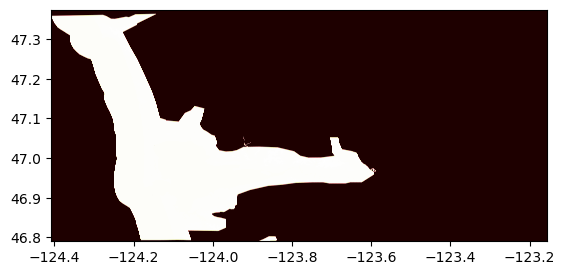

In [95]:
import rasterio
from rasterio.plot import show
src = rasterio.open('/Users/ziyangliu/Downloads/WA_SEW_dems/WA_SEW1_GCS_5m_NAVD88m.tif')

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='pink')



In [89]:
band_clipped.shape

(2883, 2220)

In [97]:
new_ulx=ulx+5511*xres
new_uly=uly+10112*yres
new_lrx=ulx+7731*xres
new_lry=uly+band_full.shape[0]*yres
print("The clipped area is bounded by ",(new_ulx,new_uly)," and ",(new_lrx,new_lry))

The clipped area is bounded by  (-124.16098693837502, 46.919782993793184)  and  (-124.06108693837501, 46.79004799379318)


In [4]:
# this cell clips the DEM file.
"""
#boundary of the clipped def file
c_ulx, c_uly=-124.1610,46.9198
c_lrx, c_lry= -124.0611,uly+yres*height
# path to where you want the clipped raster
outputSrtm = "/Users/ziyangliu/Downloads/WA_SEW_dems/clip_WA_SEW1_GCS_5m_NAVD88m.tif"
gdal.Translate(outputSrtm , elev_array, 
                    projWin = (c_ulx, c_uly,
                               c_lrx, c_lry)) # OR [ulx, uly, lrx, lry]
"""


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x164e5ac60> >

In [11]:
c_elev_array=gdal.Open(r'/Users/ziyangliu/Downloads/WA_SEW_dems/clip_WA_SEW1_GCS_5m_NAVD88m.tif')

In [13]:
#This cell also works on clipping DEM files

c_width=c_elev_array.RasterXSize        
c_height=c_elev_array.RasterYSize
c_ulx, c_xres, c_xskew, c_uly, c_yskew, c_yres = c_elev_array.GetGeoTransform()
print("before clip ",width,height,ulx, xres, xskew, uly, yskew, yres)
print("after clip ",c_width,c_height,c_ulx, c_uly, c_ulx+c_xres*c_width, c_uly+c_yres*c_height)


before clip  27820 12995 -124.40898193837502 4.500000000000022e-05 0.0 47.37482299379318 0.0 -4.500000000000003e-05
after clip  2220 2883 -124.16103193837502 46.91982799379318 -124.06113193837501 46.79009299379318


In [14]:
band1 = c_elev_array.GetRasterBand(1).ReadAsArray()
print(band1)

[[-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 ...
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]]


In [25]:
# get the full dem file before the clipping


[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


## Jan 10 check whether the DEM is compromised. Too many zeros

In [33]:
def get_clippedraster_index(lon,lat):
    # get the index of the raster file
    x_index=int((lon-c_ulx)/c_xres)
    y_index=int((lat-c_uly)/c_yres)
    column=x_index
    row=y_index
    return [row,column]

def get_raster_index(lon,lat):
    # get the index of the raster file
    x_index=int((lon-ulx)/xres)
    y_index=int((lat-uly)/yres)
    column=x_index
    row=y_index
    return [row,column]

In [31]:
getCoordinate(2050,5)

[-124.16076193837502, 46.82753299379318]

In [34]:
get_clippedraster_index(-124.16076193837502,46.82753299379318)

[2050, 6]

In [35]:
get_raster_index(-124.16076193837502,46.82753299379318)

[12162, 5516]

In [40]:
print(get_clippedraster_index(-124.092325,46.826061))
print(get_raster_index(-124.092325,46.826061))

[2083, 1526]
[12194, 7036]


In [41]:
print(band_full[12194, 7036])
print(band1[2083, 1526])

5.3171067
0.0


In [28]:
xres==c_xres

True

In [16]:
#get the y of the point whose value is 0 after clip.
y_sample=c_uly+2050*c_yres

In [24]:
y_sample

46.82757799379318

In [19]:
c_ulx

-124.16103193837502

In [20]:
x_sample=c_ulx+5*c_xres

In [21]:
x_sample

-124.16080693837502

In [18]:
round((y_sample-uly)/yres)

12161

In [22]:
round((x_sample-ulx)/xres)


5515

In [23]:
elev_array.GetRasterBand(1).ReadAsArray()[12161, 5515]

-0.5

In [9]:
print(max(band1[1056]))

13.374708


In [27]:

c=[]
for i in range(len(band1)):
    if max(band1[i])==-0.5:
        c.append(i)
print(c)


c=[]
for i in range(len(band1)):
    if max(band1[i])==0:
        c.append(i)
print(c)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146]
[2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2

In [30]:
# get the coordination in [lon,lat] from the index of the array
#i is the row, j is the column in the array
def getCoordinate(i,j):
    lon=c_ulx+c_xres*(j+1)
    lat=c_uly+c_yres*(i+1)
    return [lon,lat]

In [13]:
for i in range(len(band1[147])):
    if band1[147][i]>=0:
        print(i)
        print(band1[147][i-1],band1[147][i])
        print(getCoordinate(147,i))
        break

1025
-0.11801678 0.454991
[-124.11486193837501, 46.91316799379318]


In [14]:
print(getCoordinate(2047,1456))
print(band1[2047][1456])

[-124.09546693837501, 46.82766799379318]
5.347167


In [15]:
print(min(band1[2047]))
print(max(band1[2047]))

-0.5
57.07287


In [16]:
def elev_slr (x):
    mt = x*0.3048    #get the amount of sea level rise in unit of meter from feet
    band_mt = band1 - mt
    return band_mt

In [17]:
elev_slr(1)

array([[-0.80480003, -0.80480003, -0.80480003, ..., -0.80480003,
        -0.80480003, -0.80480003],
       [-0.80480003, -0.80480003, -0.80480003, ..., -0.80480003,
        -0.80480003, -0.80480003],
       [-0.80480003, -0.80480003, -0.80480003, ..., -0.80480003,
        -0.80480003, -0.80480003],
       ...,
       [-0.3048    , -0.3048    , -0.3048    , ..., -0.3048    ,
        -0.3048    , -0.3048    ],
       [-0.3048    , -0.3048    , -0.3048    , ..., -0.3048    ,
        -0.3048    , -0.3048    ],
       [-0.3048    , -0.3048    , -0.3048    , ..., -0.3048    ,
        -0.3048    , -0.3048    ]], dtype=float32)

In [18]:
#define a function, to determine the case of the rectangle. 15 cases in total (see wikipedia "marching squares" for reference)
#a is the top left, b is the top right, c is the bottom right, d is the bottom left, in the clockwise sequence
#a, b, c, d are not the index, they're values of the referred point
def case(a,b,c,d):
    if a>0:
        if b>0:
            if c>0:
                if d>0:
                    case_num="0"
                else:
                    case_num="1"
            else:
                if d>0:
                    case_num="2"
                else:
                    case_num="3"
        else:
            if c>0:
                if d>0:
                    case_num="4"
                else:
                    case_num="5"
            else:
                if d>0:
                    case_num="6"
                else:
                    case_num="7"
    else:
        if b>0:
            if c>0:
                if d>0:
                    case_num="8"
                else:
                    case_num="9"
            else:
                if d>0:
                    case_num="10"
                else:
                    case_num="11"
        else:
            if c>0:
                if d>0:
                    case_num="12"
                else:
                    case_num="13"
            else:
                if d>0:
                    case_num="14"
                else:
                    case_num="15"
    return case_num

In [19]:
line_list=[]
for y in np.arange(len(band1[0])-1):
    print(y)
    for x in np.arange(145,2047):
        matrix_slr=elev_slr(1)
        top_left_elev = matrix_slr[x][y]
        top_right_elev = matrix_slr[x][y+1]
        bottom_left_elev = matrix_slr[x+1][y]
        bottom_right_elev = matrix_slr[x+1][y+1]
        caseNum=case(top_left_elev,top_right_elev,bottom_right_elev,bottom_left_elev)
        if caseNum=="0" or caseNum=="15":
                continue
        #if it is case 5 or 10, then we need to get the value of the saddle point
        elif caseNum=="5":
            #get the value of the center point
            avg_elev=0.25 * (top_left_elev + top_right_elev + bottom_left_elev + bottom_right_elev)
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            if avg_elev>0:
                    
                line1=[[mid_x_axis,mid_y_axis-0.5*yres],[mid_x_axis+0.5*xres,mid_y_axis]]
                line2=[[mid_x_axis-0.5*xres,mid_y_axis],[mid_x_axis,mid_y_axis+0.5*yres]]
                line_list.append(line1)
                line_list.append(line2)
            else:
                    line1=[[mid_x_axis-0.5*xres,mid_y_axis],[mid_x_axis,mid_y_axis-0.5*yres]]
                    line2=[[mid_x_axis,mid_y_axis+0.5*yres],[mid_x_axis+0.5*xres,mid_y_axis]]
                    line_list.append(line1)
                    line_list.append(line2)
        elif caseNum=="10":
            avg_elev=0.25 * (top_left_elev + top_right_elev + bottom_left_elev + bottom_right_elev)
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            if avg_elev>0:
                line1=[[mid_x_axis-0.5*xres,mid_y_axis],[mid_x_axis,mid_y_axis-0.5*yres]]
                line2=[[mid_x_axis,mid_y_axis+0.5*yres],[mid_x_axis+0.5*xres,mid_y_axis]]
                line_list.append(line1)
                line_list.append(line2)
            else:
                line1=[[mid_x_axis,mid_y_axis-0.5*yres],[mid_x_axis+0.5*xres,mid_y_axis]]
                line2=[[mid_x_axis-0.5*xres,mid_y_axis],[mid_x_axis,mid_y_axis+0.5*yres]]
                line_list.append(line1)
                line_list.append(line2)
        elif caseNum=="1" or caseNum=="14":
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            line1=[[mid_x_axis-0.5*xres,mid_y_axis],[mid_x_axis,mid_y_axis+0.5*yres]]
            line_list.append(line1)
        elif caseNum=="2" or caseNum=="13":
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            line1=[[mid_x_axis,mid_y_axis+0.5*yres],[mid_x_axis+0.5*xres,mid_y_axis]]
            line_list.append(line1)
        elif caseNum=="3":
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            line1=[[mid_x_axis-0.5*xres,mid_y_axis],[mid_x_axis+0.5*xres,mid_y_axis]]
            line_list.append(line1)
        elif caseNum=="4" or caseNum=="11":
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            line1=[[mid_x_axis,mid_y_axis-0.5*yres],[mid_x_axis+0.5*xres,mid_y_axis]]
            line_list.append(line1)
        elif caseNum=="6":
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            line1=[[mid_x_axis,mid_y_axis-0.5*yres],[mid_x_axis,mid_y_axis+0.5*yres]]
            line_list.append(line1)
        elif caseNum=="7" or caseNum=="8":
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            line1=[[mid_x_axis-0.5*xres,mid_y_axis],[mid_x_axis,mid_y_axis-0.5*yres]]
            line_list.append(line1)
        elif caseNum=="9":
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            line1=[[mid_x_axis,mid_y_axis-0.5*yres],[mid_x_axis,mid_y_axis+0.5*yres]]
            line_list.append(line1)
        elif caseNum=="12":
            mid_x_axis = getCoordinate(x,y)[0]
            mid_y_axis= getCoordinate(x,y)[1]
            line1=[[mid_x_axis-0.5*xres,mid_y_axis],[mid_x_axis+0.5*xres,mid_y_axis]]
            line_list.append(line1)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
line_json=[]
all_line_segments=line_list.copy()
print("number of line segment is ",len(all_line_segments))
while len(all_line_segments)>0:
    print(len(line_json),len(all_line_segments))
    #create a list named line_string to store each line
    line_string=[]
    first_pt=all_line_segments[0][0]
    second_pt=all_line_segments[0][1]
    line_string.append(first_pt)
    line_string.append(second_pt)
    all_line_segments.remove(all_line_segments[0])

    
    while any(second_pt in sl for sl in all_line_segments):
        for i in range(len(all_line_segments)):
            for j in range(2):
                if all_line_segments[i][j]==second_pt:
                    if j==0:

                        line_string.append(all_line_segments[i][1])
                        second_pt=all_line_segments[i][1]
                        all_line_segments.remove(all_line_segments[i])
                    else:
                        line_string.append(all_line_segments[i][0])
                        second_pt=all_line_segments[i][0]
                        all_line_segments.remove(all_line_segments[i])
                    break
            else:
                continue    
            break
    while any(first_pt in sl for sl in all_line_segments):
        for i in range(len(all_line_segments)):
            for j in range(2):
                if all_line_segments[i][j]==first_pt:
                    if j==0:
                        line_string=[all_line_segments[i][1]]+line_string
                        first_pt=all_line_segments[i][1]
                        all_line_segments.remove(all_line_segments[i])
                    else:
                        line_string=[all_line_segments[i][0]]+line_string
                        first_pt=all_line_segments[i][0]
                        all_line_segments.remove(all_line_segments[i])
                    break
            else:
                continue
            break
    
    print(line_string)
    #if the line string is a basin, then we should not append it to the final list
    if line_string[0]==line_string[-1]:
        poly=Polygon([tuple(i) for i in line_string])
        if (line_string[0][0]-c_ulx)%xres==0:
            pt=Point(line_string[0][0]+0.5*xres,line_string[0][1])
            pt_value=elev_slr(1)[(c_uly-line_string[0][1])//abs(yres)][(line_string[0][0]-c_ulx)//xres]
            if poly.contains(pt):
                if pt_value>0:
                    line_json.append(line_string)
            else:
                if pt_value<=0:
                    line_json.append(line_string)
        else:
            pt=Point(line_string[0][0],line_string[0][1]+0.5*yres)
            pt_value=elev_slr(1)[(c_uly-line_string[0][1])//abs(yres)][(line_string[0][0]-c_ulx)//xres]
            if poly.contains(pt):
                if pt_value>0:
                    line_json.append(line_string)
            else:
                if pt_value<=0:
                    line_json.append(line_string)
        
    else:
        line_json.append(line_string)
    

In [ ]:
import json

In [1]:
from shapely.geometry import LineString

In [5]:
line1 = LineString([(0,0), (2,2)])
line2 = LineString([(0,2), (2,0)])

print(line1.intersection(line2))

POINT (1 1)


In [6]:
import sympy as sy
import sympy.geometry as gm

In [9]:
line1=gm.Line(gm.Point(0,0),gm.Point(-2,-2)) #Line1
line2=gm.Line(gm.Point(0,2),gm.Point(2,0)) #Line2
 #These are two infinite lines defined by two points on the line
intersection=line1.intersection(line2)
print(intersection[0].evalf())

Point2D(1.0, 1.0)


In [12]:
print(intersection[0][1])

1


In [13]:
line1=gm.Line(gm.Point(1,2),gm.Point(5,4))
line2=line1.perpendicular_line(line1.p2)
print(line2)

Line2D(Point2D(5, 4), Point2D(3, 8))


In [14]:
line1=gm.Line(gm.Point(1,2),gm.Point(5,4),gm.Point(6,5))